# Name Disambiguation

## enviroment setup

In [47]:
import numpy as np
import pandas as pd

import sklearn
import json

import matplotlib.pyplot as plt



## global variables

In [76]:
TRAIN_AUTHOR = "./data/train/train_author.json"
TRAIN_PUB = "./data/train/train_pub.json"

SNA_VALID_AUTHOR_RAW = "./data/sna_data/sna_valid_author_raw.json"
SNA_VALID_EXAMPLE = "./data/sna_data/sna_valid_example_evaluation_scratch.json"
SNA_VALID_PUB = "./data/sna_data/sna_valid_pub.json"

## utils

In [8]:
def load_json(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

        
    

## explore the data

In [77]:
train_author = load_json(TRAIN_AUTHOR)
train_pub = load_json(TRAIN_PUB)
sna_valid_author_raw = load_json(SNA_VALID_AUTHOR_RAW)
sna_valid_example = load_json(SNA_VALID_EXAMPLE)
sna_valid_pub = load_json(SNA_VALID_PUB)





### training data

author name count before disambiguation:  221
author name count after disambiguation: 22839
average count per name:  103.34
total paper count : 205498


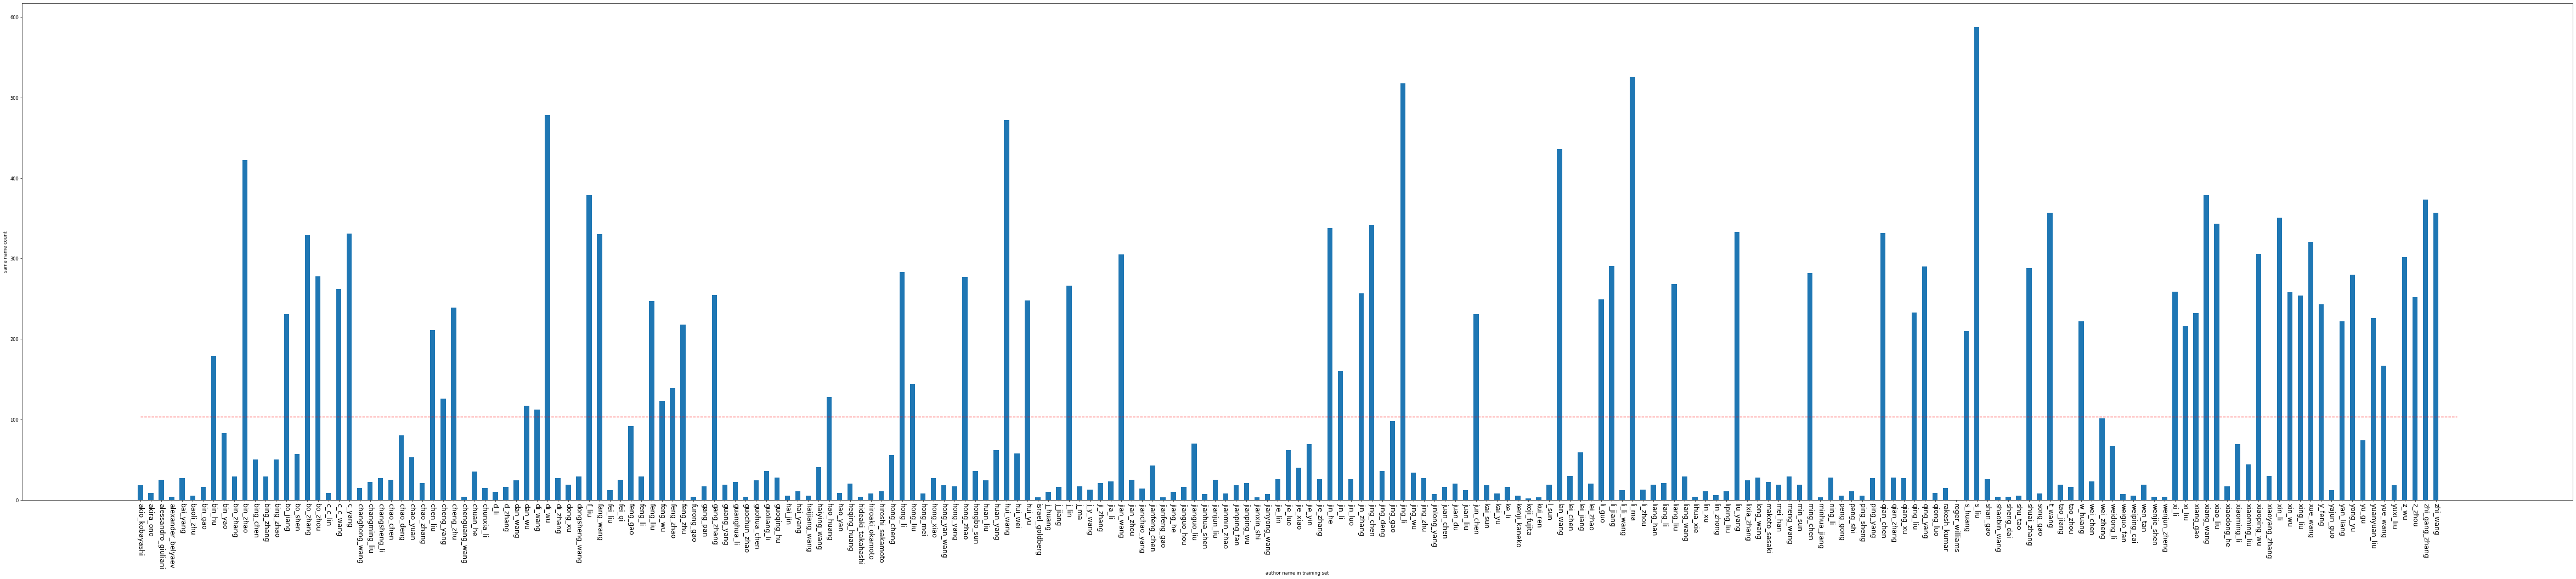

In [74]:
author_name_list = sorted([k for k in train_author.keys()])
author_same_name_count = dict((k, len(train_author[k].keys())) for k in train_author.keys())

print("author name count before disambiguation: ", len(author_name_list))
print("author name count after disambiguation:", sum([author_same_name_count[k] for k in train_author]))

plt.figure(figsize=(100, 20), dpi=60)
x = range(len(author_name_list))

plt.bar(x, [author_same_name_count[k] for k in author_name_list], width=0.5)
plt.xticks(x, author_name_list)
plt.xticks(rotation=270) 
plt.xticks(fontsize = 15)
plt.xlabel("author name in training set")
plt.ylabel("same name count")

avg_count = np.mean([author_same_name_count[k] for k in author_name_list])
print(f"average count per name: {avg_count: .2f}")
plt.hlines(avg_count, 0, len(author_name_list) + 1, linestyles = "--", color = "red", label = f"average: {avg_count}")


total_paper_count = 0
for name in train_author.keys():
    for v in train_author[name].values():
        total_paper_count += len(v)

print(f"total paper count : {total_paper_count}")
        




### validation data

In [124]:
#print(sna_valid_author_raw['heng_li'])
valid_data = dict()
for author in sna_valid_author_raw.keys():
    #print(author)
    valid_data[author] = [sna_valid_pub[paper_id] for paper_id in sna_valid_author_raw[author]]
  


author_name_list = valid_data.keys()
papers_per_author = [len(valid_data[author]) for author in author_name_list]

print(f"valid author name count: {len(author_name_list)}")
print(f"average paper per author: {np.mean(papers_per_author): .2f}")
    
#examples
test_name = "shiyi_chen"
print(f"test name: {test_name}")
for v in valid_data[test_name]:
    print(f"\npaper id: {v['id']}")
    for n in v["authors"]:
          print(n["name"])
    

valid author name count: 50
average paper per author:  917.96
test name: shiyi_chen

paper id: lsXG1s34
Hua Yinghui
Chen Shiyi
Zhai Weitao
Chen Jiwu
Li Yunxia
Wu Wei

paper id: Me1wpE9Y
Shang Xiliang
Chen Shiyi
Ren Huimin
Li Yunxia
Huang He
Zhang Jian

paper id: XnaM91Hr
Li Hong
Chen Chen
Zhang Shurong
Jiang Jia
Tao Hongyue
Xu Jialing
Sun Jianguo
Zhong Wei
Chen Shiyi

paper id: jZ3FQhj7
Chen ShiYi
Chen YingChun
Xia ZhenHua
Qu Kun
Shi YiPeng
Xiao ZuoLi
Liu QiuHong
Cai QingDong
Liu Feng
Lee Cunbiao
Zhang RiKui
Cai JinSheng

paper id: 6REXg7xD
Chen Zheng
Dai Peng
Chen Shiyi

paper id: sg8TCov0
Dong Yu
Chen Shiyi
Li Yunxia
Zhai Weitao
Chen Jiwu
Hua Yinghui

paper id: zce1mgjE
Chen Jiwu
Chen Shiyi
Zhai Weitao
Hua Yinghui
Li Yunxia
Li Hongyun

paper id: QJtKpvCf
Jiang Zhou
Xiao Zuoli
Shi Yipeng
Chen Shiyi

paper id: VKvgvLWe
Chen Shiyi

paper id: s53Kc3om
Zhao Yaomin
Yang Yue
Chen Shiyi

paper id: jbytJoVJ
Rapaka Saikiran
Chen Shiyi
Pawar Rajesh J.
Stauffer Philip H.
Zhang Dongxiao

paper id